In [1]:
import permutationTest as pt 
import numpy as np
import time
import pickle
from plots import timePlotSNS

In [2]:
sampleShape = [10,50,100,150,200,250,300,400,500]
n_samples = 5
bins =  500
mean =0.2
std = 1

data_variables = (sampleShape, n_samples, bins, mean, std)

In [3]:
data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]


In [4]:
def runExperiment(method_list, names_list, data_generator, data_variables):
    sampleShape, n_samples, bins, mean, std = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for size in sampleShape:
                
                A = np.asarray(data_generator(mean, std, size ,1))
                B = np.asarray(data_generator(mean, std, size ,1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B,bins)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
            
    return method_dict
    

In [5]:
#method_list = [pt.GreenFloatCuda]
#names_list = ["RTX2070"]
#RTX2070_dict = runExperiment(method_list, names_list, data_generator, data_variables)

In [6]:
#pickle.dump(RTX2070_dict,open("./experiment_data/experiment2/RTX2070_dict.pkl", "wb"))

In [7]:
!ls "experiment_data/experiment2"

RTX2060_dict.pkl  RTX2070_dict.pkl  TITANX_dict.pkl


In [8]:
RTX2060_dict = pickle.load(open("experiment_data/experiment2/RTX2060_dict.pkl", "rb"))
RTX2070_dict = pickle.load(open("experiment_data/experiment2/RTX2070_dict.pkl", "rb"))
TITANX_dict = pickle.load(open("experiment_data/experiment2/TITANX_dict.pkl", "rb"))

In [9]:
TimeList_list = [RTX2060_dict["RTX2060"]["time"], 
                 RTX2070_dict["RTX2070"]["time"],
                 TITANX_dict["TITANX"]["time"]
                ]
NameList = ["RTX2060", "RTX2070", "TITANX"]

In [10]:
rep_samples = sampleShape * n_samples

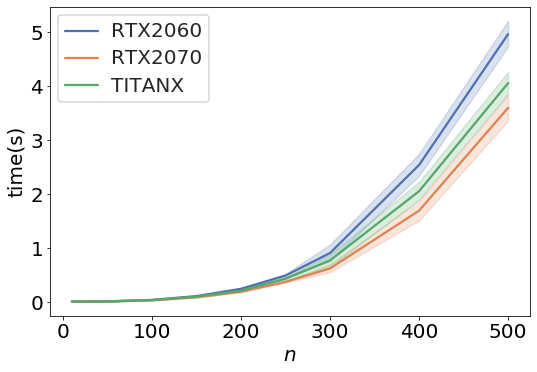

In [11]:
timePlotSNS(TimeList_list, NameList, rep_samples, 'time(s)',  r"$n$", path="./figures/experiemnt2/GPU_comparison")

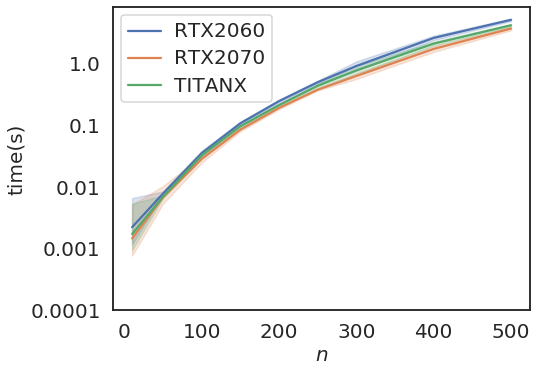

In [12]:
timePlotSNS(TimeList_list, NameList, rep_samples, 'time(s)',  r"$n$", log=True, path="./figures/experiemnt2/GPU_comparisonLog")